<a href="https://colab.research.google.com/github/kittikhun62/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [2]:
Name = 'กิตติคุณ เกียรติศักดิ์ศิริ'
ID = '6230207600'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

020:30:26


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,5.416075,-2.888296,-9.690855,1.151488,6.831063,9.293195,-8.909361,9.443475,1.118379,-2.828672,0.668603,9.301132,2.385790,5.322632,-8.452852,-7.019485,-0.807720,-1.064149,4.107312,-2.104505,9.330283,-3.486679,-9.123284,3.891806,5.492582,-4.017073,5.771277,-9.422485,7.588485,5.476468,-5.776593,29.382341
1,5.638002,7.434348,6.938144,-5.132548,-5.510815,-4.016085,9.337993,1.893596,6.388560,-10.237081,7.187227,-10.364249,-8.742190,-11.252525,-4.958954,-3.794558,7.448764,6.726902,3.591231,7.856392,-10.350801,4.573680,-8.220857,-5.916394,9.382741,-3.097172,3.572651,0.522263,3.232410,3.633443,14.868695,20.167216
2,-7.220028,-0.614491,-7.107496,7.942849,7.531426,-8.986606,7.645296,7.405065,8.909399,3.817976,-6.052293,-2.736666,9.038209,-4.603534,-7.230034,-6.978646,1.677081,-10.097775,3.324187,-7.788909,-2.046759,-7.999054,2.914059,-5.503368,2.667048,1.525047,-4.521728,-7.119456,10.828507,2.734674,-1.228981,15.673372
3,0.089878,-2.777883,-6.315279,10.872088,0.054131,3.863607,-5.127266,4.674919,2.315250,3.487482,7.572337,6.711543,-2.472755,6.071854,-8.120181,4.726856,7.098735,0.852519,2.958719,8.679304,-3.037238,-1.475192,-0.776509,4.719256,-11.387332,-7.853765,-7.406368,6.772154,-3.939882,2.404448,-5.555767,14.022238
4,-0.628979,-5.618153,0.211425,9.080674,-7.754356,-2.478280,-1.074501,-4.126352,-10.404390,-5.484654,8.853849,-4.687855,-9.477161,0.472042,3.276229,-2.864122,7.904986,-7.056542,10.689867,-0.728703,7.775956,1.398570,-6.860539,-9.318607,9.403887,8.721467,4.972809,0.058038,-3.073761,7.794832,-11.236306,40.974161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.199102,-0.084611,-9.190400,4.760778,8.053412,7.844466,7.094928,4.142584,-9.773201,7.500047,6.429884,-0.491096,7.745518,8.591163,-5.879933,-6.851440,-1.124146,-3.659094,-2.930545,3.772390,-0.727309,-5.349916,2.966403,-3.034193,-9.081341,4.222648,8.852117,-10.259300,-3.977083,-6.633752,-0.169221,-31.168761
9996,-5.392829,-9.394138,-5.537593,-8.153520,-5.236436,2.035193,-9.913706,-7.947207,2.386956,0.985030,-4.427184,-1.682243,1.408151,-2.682320,-9.122236,8.808176,7.982695,6.772614,-10.877059,-7.632752,-8.536176,1.471711,3.379473,5.962480,3.459546,4.933643,-6.565265,-0.033915,3.943987,-5.777516,-18.788276,-26.887582
9997,5.939191,7.816525,-10.299744,-7.247408,7.905203,0.569370,8.087939,1.321670,6.182306,-1.985572,6.626791,-1.066578,-0.951390,-1.233851,-1.206060,8.095168,-2.334292,-2.762005,-2.088553,-0.655406,3.410459,-6.253089,3.113665,-2.707688,7.452593,-6.606251,6.249281,-2.613518,-8.335171,6.609438,15.633051,35.047190
9998,0.197766,3.540739,1.923010,5.114985,-4.794595,-9.145112,7.873624,5.396238,0.083500,7.798964,-2.370559,7.045790,4.071558,0.076799,9.622270,8.849059,6.668561,-2.199493,-10.995283,6.953046,-9.548324,-2.923515,-1.386035,9.638675,-5.114965,-5.628264,-2.888274,-9.297920,1.002521,-6.314678,7.081477,-29.573389


2 ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

In [13]:
Data.shape #มีทั้งหมด 32 dimension

(10000, 32)

เราจะจัดกลุ่มข้อมูล โดยใช้ Kmean


###Import

In [43]:
from sklearn.cluster import KMeans
# ทำการ improt ที่ต้องการใช้ในการทำ K-mean เพื่อนำมาจัดเรียงข้อมูล

## Define

In [44]:
Kmeans = KMeans(n_clusters  = 3, random_state = 2021 ) #random_state =2021 เริ่มที่จุดเดียวกัน หากลุ่มที่มีลักษณะคล้ายๆหรือใกล้ๆกันหรือเหมือนกัน

## Fit-Transform

ตำนวณหาจุด cluter centers ของข้อมูล ด้วยวิธี K-means clustering

In [46]:
Kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

เเสดงจุด cluster centers ที่คำนวณออกมาได้

In [47]:
Kmeans.cluster_centers_

array([[  3.56616948,   7.29934901,  -0.05641714,  -2.70644835,
         -2.03604063,   2.27778211,   2.81840454,   1.66153144,
          2.82054511,  -2.53218636,   0.52412591,  -1.34800505,
         -1.74832641,  -1.88225648,  -2.94431141,  -0.671242  ,
         -3.35335952,   1.26669222,   2.82445451,  -0.88473528,
          0.61205662,   1.7061681 ,  -1.58112618,  -2.07657575,
          4.26182921,  -2.57548182,   1.51226967,   1.71827346,
         -2.8648198 ,   2.07261231,  14.59869801,  12.36306153],
       [ -0.90881828,  -1.58023305,  -0.53836658,   1.49607419,
          0.93891327,   0.13812489,  -0.94650958,  -2.43599269,
         -1.75593746,   3.37756403,  -0.71043126,   1.61055876,
          2.47041456,   3.57953537,  -1.78279952,  -0.39803901,
          2.96977149,   0.84511829,  -3.05919496,   0.9921361 ,
         -0.83086912,  -1.64495613,  -1.57117895,  -0.51652441,
         -0.60231046,   0.13107626,  -1.86395114,  -2.5191393 ,
          0.85215081,  -6.82598622,  -3

ทดสอบการจัดกลุ่มของ Data

In [48]:
y = Kmeans.predict(Data)
y 

array([2, 0, 2, ..., 0, 1, 0], dtype=int32)

#ทำ PCA เพื่อลด DIMENTION ของข้อมูลให้เหลือ 2 DIMENTION ตามโจทย์

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

new_pca = pca.fit_transform(Data)

In [50]:
new_pca

array([[-29.81852292, -10.85602702],
       [-24.07439045,  21.15618164],
       [-15.39983467,  -2.50736116],
       ...,
       [-38.48569598,  13.84459754],
       [ 31.86523936,  10.19575885],
       [ -5.11489541,  19.05265885]])

In [51]:
pca = PCA(n_components = 4)

In [52]:
from matplotlib import  pyplot as plt

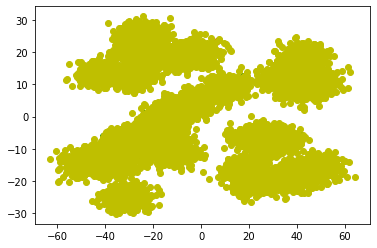

In [53]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy')

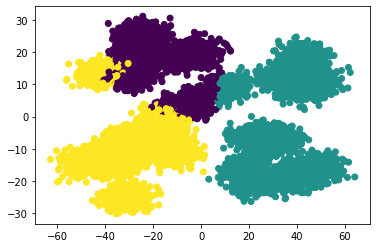

In [55]:
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

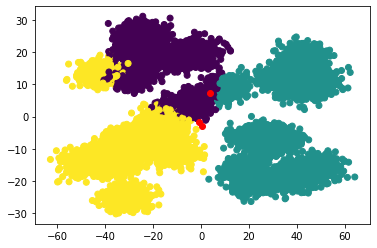

In [56]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y) # cluster center
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'or')

SSE

In [57]:
kmeans.inertia_

11348589.29093799

In [58]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [59]:
SSE

[20753125.440506306,
 12770766.433320392,
 11348589.29093799,
 10319567.889919927,
 9451413.005473346,
 8807771.243344527,
 8262246.262440401,
 7730810.008455613]

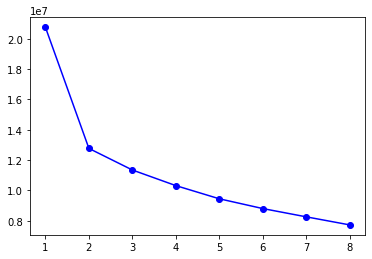

In [60]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')